# 入金方法の検討

「敗者のゲーム」では、高値掴みを避けるために「ドル・コスト平均法」で購入時期を分散させることを推奨している。

これに対して、ドル・コスト平均法はゆっくり同じリスクをとっているだけで意味がないという反論もある。
<br>
確かにリスクは下がるが、これはお金をしばらく投資しないことによるリスク低下であり、
機会損失を発生させてしまっていることになる。<br>
市場が正規分布に従い、期待リターンが正であることを前提に投資するのであれば、一括投資すべきという考え方である。<br><br>
一括投資する場合、株式投資の利益の源泉は「嫌な気持ち」であることを理解しておかないといけない。<br>
買いたいという気持ちの時に買うと儲からない。買いたくないと思いながら、購入ボタンを押す必要がある。

<br>
ドル・コスト平均法と一括投資でどのような違いが出てくるかを検証してみる。

### TOPIXの検証の時に使用したシミュレーションのパラメータを使用する

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
#パラメータを設定
loc1=1.0005478168389164
scale1=0.01024285501985374
loc2=0.9977185541742207
scale2=0.03156247263311538

In [2]:
#関数を定義
def make_return():
    if np.random.rand()<0.05:
        a=np.random.normal(loc2,scale2)
        svm_result=-1
    else:
        a=np.random.normal(loc1,scale1)
        svm_result=1
    return a,svm_result

In [3]:
#5年間のシミュレーションデータを100個作成
df_sim1=pd.DataFrame()

from tqdm import tqdm
for j in tqdm(range(100)):
    return_list=[]
    for i in range(240*5):
        a,svm_result=make_return()
        return_list.append(a)
    return_list=np.array(return_list)
    df_sim1[j]=return_list

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.15it/s]


In [4]:
df_sim1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.004218,1.009103,1.007677,0.996608,1.007504,0.988139,0.995923,0.989566,1.016098,0.990176,...,1.000660,0.987737,0.978364,1.014182,0.987797,0.995614,0.942930,1.015177,1.001074,0.993412
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,1.001098,0.997457,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613
2,0.995165,1.009641,1.008853,1.012344,1.006656,0.996153,0.997204,0.996499,1.002140,1.027882,...,0.994835,0.980917,1.022546,0.989716,1.003087,1.015601,0.994081,0.992580,1.000988,1.004402
3,0.984145,0.997295,1.003345,0.994592,0.992288,1.001636,1.001041,1.000598,1.001832,1.003687,...,0.993540,0.986874,1.012342,1.013901,0.995950,1.014352,1.005949,1.006829,0.981108,0.992720
4,1.012867,0.991097,1.009930,0.989178,0.987371,1.006542,0.998026,0.998413,1.008289,0.997439,...,0.988723,1.016778,0.999214,1.008464,1.004492,0.993707,1.006532,1.005156,0.995900,0.992819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.004419,1.014112,1.008815,1.003363,1.012320,1.022422,1.008310,0.996866,1.001569,1.008407,...,0.993996,0.993897,0.996402,1.051308,0.998493,0.996732,1.015020,0.994384,1.005172,1.007077
1196,0.995085,1.007785,1.014302,0.988399,0.991570,1.013315,1.015620,0.983589,1.012559,0.997509,...,0.992146,0.977444,1.010026,0.998284,0.986467,1.005248,0.990315,0.994448,1.022604,1.001451
1197,1.014140,1.012735,0.991210,1.000246,0.998245,1.018314,0.980865,1.006845,1.009186,0.986661,...,0.989087,1.003588,1.002467,1.015035,1.019794,1.008218,0.986413,1.003518,1.017122,1.052061
1198,0.997123,0.998282,0.998445,1.007559,1.011581,0.994152,1.018413,1.020794,0.994398,1.000157,...,1.017772,1.000108,0.991014,0.991423,1.004637,0.999055,1.013263,0.993697,1.001948,1.015349


### 一括投資した場合の検証

In [5]:
df_onetime=df_sim1.copy()
df_onetime.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.004218,1.009103,1.007677,0.996608,1.007504,0.988139,0.995923,0.989566,1.016098,0.990176,...,1.000660,0.987737,0.978364,1.014182,0.987797,0.995614,0.942930,1.015177,1.001074,0.993412
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,1.001098,0.997457,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613
2,0.995165,1.009641,1.008853,1.012344,1.006656,0.996153,0.997204,0.996499,1.002140,1.027882,...,0.994835,0.980917,1.022546,0.989716,1.003087,1.015601,0.994081,0.992580,1.000988,1.004402
3,0.984145,0.997295,1.003345,0.994592,0.992288,1.001636,1.001041,1.000598,1.001832,1.003687,...,0.993540,0.986874,1.012342,1.013901,0.995950,1.014352,1.005949,1.006829,0.981108,0.992720
4,1.012867,0.991097,1.009930,0.989178,0.987371,1.006542,0.998026,0.998413,1.008289,0.997439,...,0.988723,1.016778,0.999214,1.008464,1.004492,0.993707,1.006532,1.005156,0.995900,0.992819


In [6]:
df_onetime['一括投資']=0
df_onetime.loc[0,'一括投資']=100
df_onetime.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,一括投資
0,1.004218,1.009103,1.007677,0.996608,1.007504,0.988139,0.995923,0.989566,1.016098,0.990176,...,0.987737,0.978364,1.014182,0.987797,0.995614,0.942930,1.015177,1.001074,0.993412,100
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,0.997457,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613,0
2,0.995165,1.009641,1.008853,1.012344,1.006656,0.996153,0.997204,0.996499,1.002140,1.027882,...,0.980917,1.022546,0.989716,1.003087,1.015601,0.994081,0.992580,1.000988,1.004402,0
3,0.984145,0.997295,1.003345,0.994592,0.992288,1.001636,1.001041,1.000598,1.001832,1.003687,...,0.986874,1.012342,1.013901,0.995950,1.014352,1.005949,1.006829,0.981108,0.992720,0
4,1.012867,0.991097,1.009930,0.989178,0.987371,1.006542,0.998026,0.998413,1.008289,0.997439,...,1.016778,0.999214,1.008464,1.004492,0.993707,1.006532,1.005156,0.995900,0.992819,0


In [7]:
df_onetime['一括投資結果']=df_onetime['一括投資']
df_onetime.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,一括投資,一括投資結果
0,1.004218,1.009103,1.007677,0.996608,1.007504,0.988139,0.995923,0.989566,1.016098,0.990176,...,0.978364,1.014182,0.987797,0.995614,0.942930,1.015177,1.001074,0.993412,100,100
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613,0,0
2,0.995165,1.009641,1.008853,1.012344,1.006656,0.996153,0.997204,0.996499,1.002140,1.027882,...,1.022546,0.989716,1.003087,1.015601,0.994081,0.992580,1.000988,1.004402,0,0
3,0.984145,0.997295,1.003345,0.994592,0.992288,1.001636,1.001041,1.000598,1.001832,1.003687,...,1.012342,1.013901,0.995950,1.014352,1.005949,1.006829,0.981108,0.992720,0,0
4,1.012867,0.991097,1.009930,0.989178,0.987371,1.006542,0.998026,0.998413,1.008289,0.997439,...,0.999214,1.008464,1.004492,0.993707,1.006532,1.005156,0.995900,0.992819,0,0


In [8]:
for j in tqdm(df_onetime.columns[:-2]):
    df_onetime['一括投資結果']=df_onetime['一括投資']
    for i in range(1,len(df_onetime)):
        df_onetime.loc[i,"一括投資結果"]=df_onetime.loc[i-1,"一括投資結果"]*df_onetime.loc[i,j]
    df_onetime[j]=df_onetime["一括投資結果"]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.65it/s]


In [9]:
#最初に100万円を一括投資した結果
df_onetime

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,一括投資,一括投資結果
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100.000000
1,100.012421,99.897162,99.623092,101.722349,102.993185,100.938420,98.735620,99.222705,99.923820,98.104495,...,99.455073,100.640215,100.603240,100.146510,100.494782,100.906921,100.209915,100.461307,0,100.461307
2,99.528908,100.860272,100.505006,102.978058,103.678711,100.550097,98.459513,98.875331,100.137706,100.839802,...,101.697354,99.605186,100.913792,101.708849,99.899967,100.158205,100.308922,100.903511,0,100.903511
3,97.950879,100.587472,100.841206,102.421163,102.879090,100.714576,98.561978,98.934492,100.321144,101.211614,...,102.952482,100.989797,100.505125,103.168553,100.494279,100.842169,98.413844,100.168900,0,100.168900
4,99.211220,99.691918,101.842536,101.312755,101.579847,101.373455,98.367393,98.777470,101.152675,100.952383,...,102.871547,101.844553,100.956640,102.519321,101.150690,101.362131,98.010351,99.449590,0,99.449590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,165.942384,130.469019,343.448766,218.399727,177.333057,450.927365,134.023612,91.377516,86.703912,194.861738,...,325.257687,190.988104,156.973634,267.908158,143.929799,158.390870,327.550289,286.299572,0,286.299572
1196,165.126757,131.484725,348.360738,215.866089,175.838144,456.931652,136.117005,89.877901,87.792832,194.376330,...,328.518877,190.660334,154.849312,269.314249,142.535880,157.511558,334.954097,286.714856,0,286.714856
1197,167.461587,133.159185,345.298593,215.919104,175.529478,465.300037,133.512409,90.493140,88.599287,191.783533,...,329.329386,193.526947,157.914394,271.527463,140.599249,158.065665,340.689283,301.641635,0,301.641635
1198,166.979860,132.930375,344.761710,217.551258,177.562285,462.578735,135.970791,92.374832,88.102964,191.813683,...,326.369982,191.867143,158.646650,271.270916,142.463959,157.069344,341.353040,306.271494,0,306.271494


### ドル・コスト平均法を使った場合の検証

In [10]:
df_dollcost=df_sim1.copy()
df_dollcost.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.004218,1.009103,1.007677,0.996608,1.007504,0.988139,0.995923,0.989566,1.016098,0.990176,...,1.000660,0.987737,0.978364,1.014182,0.987797,0.995614,0.942930,1.015177,1.001074,0.993412
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,1.001098,0.997457,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613
2,0.995165,1.009641,1.008853,1.012344,1.006656,0.996153,0.997204,0.996499,1.002140,1.027882,...,0.994835,0.980917,1.022546,0.989716,1.003087,1.015601,0.994081,0.992580,1.000988,1.004402
3,0.984145,0.997295,1.003345,0.994592,0.992288,1.001636,1.001041,1.000598,1.001832,1.003687,...,0.993540,0.986874,1.012342,1.013901,0.995950,1.014352,1.005949,1.006829,0.981108,0.992720
4,1.012867,0.991097,1.009930,0.989178,0.987371,1.006542,0.998026,0.998413,1.008289,0.997439,...,0.988723,1.016778,0.999214,1.008464,1.004492,0.993707,1.006532,1.005156,0.995900,0.992819


In [11]:
#5日に一回1万円を500日後まで入金
df_dollcost["ドルコスト平均"]=0

for i in np.arange(0,500,5):
    df_dollcost.loc[i,"ドルコスト平均"]=1
df_dollcost

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ドルコスト平均
0,1.004218,1.009103,1.007677,0.996608,1.007504,0.988139,0.995923,0.989566,1.016098,0.990176,...,0.987737,0.978364,1.014182,0.987797,0.995614,0.942930,1.015177,1.001074,0.993412,1
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,0.997457,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613,0
2,0.995165,1.009641,1.008853,1.012344,1.006656,0.996153,0.997204,0.996499,1.002140,1.027882,...,0.980917,1.022546,0.989716,1.003087,1.015601,0.994081,0.992580,1.000988,1.004402,0
3,0.984145,0.997295,1.003345,0.994592,0.992288,1.001636,1.001041,1.000598,1.001832,1.003687,...,0.986874,1.012342,1.013901,0.995950,1.014352,1.005949,1.006829,0.981108,0.992720,0
4,1.012867,0.991097,1.009930,0.989178,0.987371,1.006542,0.998026,0.998413,1.008289,0.997439,...,1.016778,0.999214,1.008464,1.004492,0.993707,1.006532,1.005156,0.995900,0.992819,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.004419,1.014112,1.008815,1.003363,1.012320,1.022422,1.008310,0.996866,1.001569,1.008407,...,0.993897,0.996402,1.051308,0.998493,0.996732,1.015020,0.994384,1.005172,1.007077,0
1196,0.995085,1.007785,1.014302,0.988399,0.991570,1.013315,1.015620,0.983589,1.012559,0.997509,...,0.977444,1.010026,0.998284,0.986467,1.005248,0.990315,0.994448,1.022604,1.001451,0
1197,1.014140,1.012735,0.991210,1.000246,0.998245,1.018314,0.980865,1.006845,1.009186,0.986661,...,1.003588,1.002467,1.015035,1.019794,1.008218,0.986413,1.003518,1.017122,1.052061,0
1198,0.997123,0.998282,0.998445,1.007559,1.011581,0.994152,1.018413,1.020794,0.994398,1.000157,...,1.000108,0.991014,0.991423,1.004637,0.999055,1.013263,0.993697,1.001948,1.015349,0


In [12]:
df_dollcost.loc[0,'ドルコスト平均結果']=1

for j in tqdm(df_dollcost.columns[:-2]):
    for i in range(1,len(df_dollcost)):
        df_dollcost.loc[i,"ドルコスト平均結果"]=df_dollcost.loc[i-1,"ドルコスト平均結果"]*df_dollcost.loc[i,j]+df_dollcost.loc[i,"ドルコスト平均"]
    df_dollcost[j]=df_dollcost['ドルコスト平均結果']        
df_dollcost.head()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.91it/s]


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,ドルコスト平均,ドルコスト平均結果
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613,0,1.004613
2,0.995289,1.008603,1.005050,1.029781,1.036787,1.005501,0.984595,0.988753,1.001377,1.008398,...,1.016974,0.996052,1.009138,1.017088,0.999000,1.001582,1.003089,1.009035,0,1.009035
3,0.979509,1.005875,1.008412,1.024212,1.028791,1.007146,0.985620,0.989345,1.003211,1.012116,...,1.029525,1.009898,1.005051,1.031686,1.004943,1.008422,0.984138,1.001689,0,1.001689
4,0.992112,0.996919,1.018425,1.013128,1.015798,1.013735,0.983674,0.987775,1.011527,1.009524,...,1.028715,1.018446,1.009566,1.025193,1.011507,1.013621,0.980104,0.994496,0,0.994496


In [13]:
df_dollcost

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,ドルコスト平均,ドルコスト平均結果
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000
1,1.000124,0.998972,0.996231,1.017223,1.029932,1.009384,0.987356,0.992227,0.999238,0.981045,...,0.994551,1.006402,1.006032,1.001465,1.004948,1.009069,1.002099,1.004613,0,1.004613
2,0.995289,1.008603,1.005050,1.029781,1.036787,1.005501,0.984595,0.988753,1.001377,1.008398,...,1.016974,0.996052,1.009138,1.017088,0.999000,1.001582,1.003089,1.009035,0,1.009035
3,0.979509,1.005875,1.008412,1.024212,1.028791,1.007146,0.985620,0.989345,1.003211,1.012116,...,1.029525,1.009898,1.005051,1.031686,1.004943,1.008422,0.984138,1.001689,0,1.001689
4,0.992112,0.996919,1.018425,1.013128,1.015798,1.013735,0.983674,0.987775,1.011527,1.009524,...,1.028715,1.018446,1.009566,1.025193,1.011507,1.013621,0.980104,0.994496,0,0.994496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,176.153627,124.273030,364.322177,177.109514,133.268090,362.711946,156.100881,74.329340,93.948361,176.914257,...,209.515551,163.710651,146.202670,204.415714,152.216984,176.100681,278.232543,195.999211,0,195.999211
1196,175.287810,125.240500,369.532678,175.054881,132.144643,367.541608,158.539112,73.109507,95.128264,176.473557,...,211.616255,163.429694,144.224112,205.488570,150.742806,175.123053,284.521593,196.283512,0,196.283512
1197,177.766313,126.835440,366.284428,175.097873,131.912677,374.272876,155.505469,73.609962,96.002102,174.119565,...,212.138346,165.886889,147.078878,207.177267,148.694668,175.739115,289.393259,206.502308,0,206.502308
1198,177.254943,126.617495,365.714916,176.421455,133.440358,372.083946,158.368812,75.140589,95.464309,174.146939,...,210.232038,164.464144,147.760890,206.981520,150.666743,174.631395,289.957077,209.671886,0,209.671886


### 一括投資の結果をグラフ化

損失回数：20/100
95%点:315.847
中央値:147.346
5%点:76.628


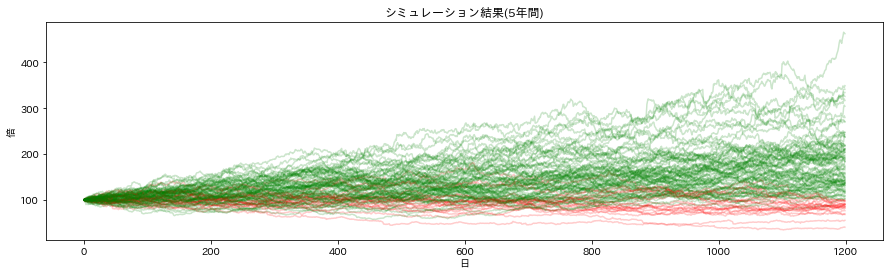

In [14]:
#結果を可視化
plt.figure(figsize=(15,4))
num=0
for i in df_onetime.columns[:-2]:
    temp=df_onetime[i]
    if temp.iloc[-1]<100:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
        
print("損失回数：{}/100".format(num))
print("95%点:{:.3f}".format(df_onetime.iloc[-1,:].quantile(0.95)))
print("中央値:{:.3f}".format(df_onetime.iloc[-1,:].median()))
print("5%点:{:.3f}".format(df_onetime.iloc[-1,:].quantile(0.05)))

plt.title('シミュレーション結果(5年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()

### ドル・コスト平均法の結果をグラフ化

損失回数：24/100
95%点:266.080
中央値:134.087
5%点:76.633


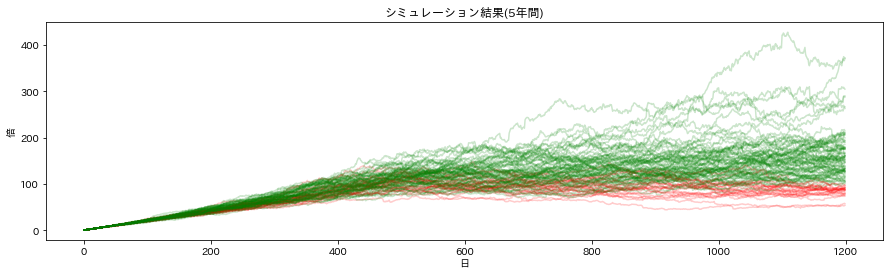

In [15]:
#結果を可視化
plt.figure(figsize=(15,4))
num=0
for i in df_dollcost.columns[:-2]:
    temp=df_dollcost[i]
    if temp.iloc[-1]<100:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
        
print("損失回数：{}/100".format(num))
print("95%点:{:.3f}".format(df_dollcost.iloc[-1,:].quantile(0.95)))
print("中央値:{:.3f}".format(df_dollcost.iloc[-1,:].median()))
print("5%点:{:.3f}".format(df_dollcost.iloc[-1,:].quantile(0.05)))

plt.title('シミュレーション結果(5年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()

- 乱数にもよるが、中央値、95%点は一括投資のほうが優れている傾向にある。
- 5%点については、あまり大差がない状況